# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [8]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def resize_images(data,size):
    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    return resized_data    

In [10]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [11]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    label_test1 = pickle.load(open_ai_quick)
    data_train1 = resize_images(data_train,(15,15))
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

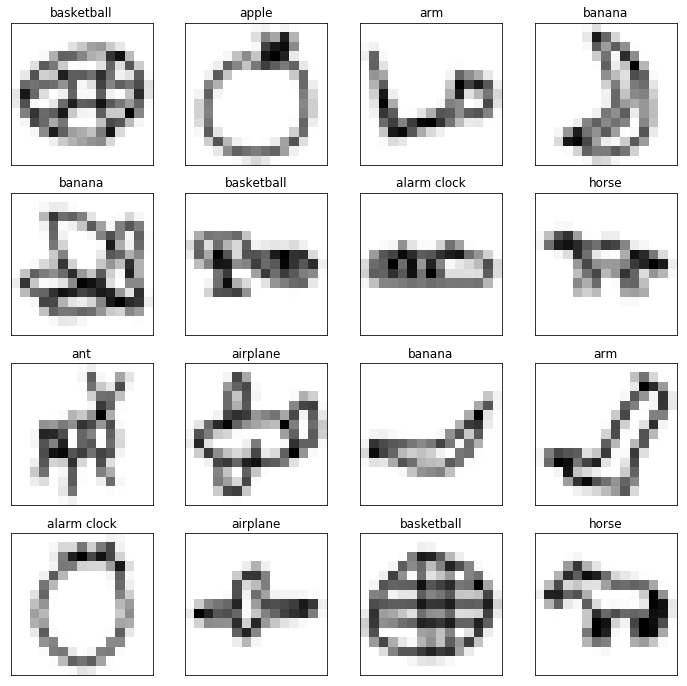

In [12]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train1.shape[0])
    plt.imshow(data_train1[ind,:].reshape((15,15)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [13]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train1.shape[1]))
#model.add(Dense(256, activation='relu'))
# you can add more Dense layers here
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train1, label_train, epochs=500, batch_size=32)

Epoch 1/500
100000/100000 [==============================] - 3s 34us/step - loss: 3.0138 - accuracy: 0.6756
Epoch 2/500
100000/100000 [==============================] - 3s 32us/step - loss: 1.1287 - accuracy: 0.7432
Epoch 3/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.1127 - accuracy: 0.7535
Epoch 4/500
100000/100000 [==============================] - 3s 31us/step - loss: 1.1245 - accuracy: 0.7570
Epoch 5/500
100000/100000 [==============================] - 3s 30us/step - loss: 1.1452 - accuracy: 0.7586
Epoch 6/500
100000/100000 [==============================] - 3s 30us/step - loss: 1.1523 - accuracy: 0.7578
Epoch 7/500
100000/100000 [==============================] - 3s 30us/step - loss: 1.1668 - accuracy: 0.7625
Epoch 8/500
100000/100000 [==============================] - 3s 30us/step - loss: 1.1688 - accuracy: 0.7601
Epoch 9/500
100000/100000 [==============================] - 3s 30us/step - loss: 1.1825 - accuracy: 0.7595
Epoch 10/500
100000/100000 [

100000/100000 [==============================] - 4s 43us/step - loss: 1.2291 - accuracy: 0.7528
Epoch 77/500
100000/100000 [==============================] - 4s 42us/step - loss: 1.2205 - accuracy: 0.7526
Epoch 78/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.2197 - accuracy: 0.7523
Epoch 79/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2178 - accuracy: 0.7517
Epoch 80/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.2133 - accuracy: 0.7544
Epoch 81/500
100000/100000 [==============================] - 5s 45us/step - loss: 1.2154 - accuracy: 0.7540
Epoch 82/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.2147 - accuracy: 0.7528
Epoch 83/500
100000/100000 [==============================] - 4s 40us/step - loss: 1.2285 - accuracy: 0.7530
Epoch 84/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.2054 - accuracy: 0.7538
Epoch 85/500
100000/100000 [====

100000/100000 [==============================] - 5s 50us/step - loss: 1.1231 - accuracy: 0.7537
Epoch 151/500
100000/100000 [==============================] - 5s 52us/step - loss: 1.1216 - accuracy: 0.7523
Epoch 152/500
100000/100000 [==============================] - 5s 54us/step - loss: 1.1271 - accuracy: 0.7538
Epoch 153/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.1187 - accuracy: 0.7524
Epoch 154/500
100000/100000 [==============================] - 6s 56us/step - loss: 1.1214 - accuracy: 0.7527
Epoch 155/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.1193 - accuracy: 0.7533
Epoch 156/500
100000/100000 [==============================] - 6s 65us/step - loss: 1.1213 - accuracy: 0.7523
Epoch 157/500
100000/100000 [==============================] - 6s 58us/step - loss: 1.1209 - accuracy: 0.7529
Epoch 158/500
100000/100000 [==============================] - 6s 57us/step - loss: 1.1319 - accuracy: 0.7520
Epoch 159/500
100000/100

100000/100000 [==============================] - 7s 67us/step - loss: 1.1007 - accuracy: 0.7510
Epoch 225/500
100000/100000 [==============================] - 7s 69us/step - loss: 1.0895 - accuracy: 0.7526
Epoch 226/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.0743 - accuracy: 0.7510
Epoch 227/500
100000/100000 [==============================] - 8s 78us/step - loss: 1.0932 - accuracy: 0.7531
Epoch 228/500
100000/100000 [==============================] - 7s 73us/step - loss: 1.0805 - accuracy: 0.7532
Epoch 229/500
100000/100000 [==============================] - 7s 68us/step - loss: 1.0880 - accuracy: 0.7519
Epoch 230/500
100000/100000 [==============================] - 7s 71us/step - loss: 1.0832 - accuracy: 0.7504
Epoch 231/500
100000/100000 [==============================] - 7s 70us/step - loss: 1.0890 - accuracy: 0.7520
Epoch 232/500
100000/100000 [==============================] - 7s 67us/step - loss: 1.0960 - accuracy: 0.7512
Epoch 233/500
100000/100

100000/100000 [==============================] - 5s 53us/step - loss: 1.0622 - accuracy: 0.7513
Epoch 299/500
100000/100000 [==============================] - 5s 45us/step - loss: 1.0562 - accuracy: 0.7493
Epoch 300/500
100000/100000 [==============================] - 4s 43us/step - loss: 1.0577 - accuracy: 0.7492
Epoch 301/500
100000/100000 [==============================] - 4s 44us/step - loss: 1.0609 - accuracy: 0.7507
Epoch 302/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.0614 - accuracy: 0.7505
Epoch 303/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.0467 - accuracy: 0.7499
Epoch 304/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0624 - accuracy: 0.7508
Epoch 305/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0459 - accuracy: 0.7496
Epoch 306/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0505 - accuracy: 0.7486
Epoch 307/500
100000/100

100000/100000 [==============================] - 5s 49us/step - loss: 1.0262 - accuracy: 0.7481
Epoch 373/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0231 - accuracy: 0.7488
Epoch 374/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0293 - accuracy: 0.7478
Epoch 375/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0209 - accuracy: 0.7482
Epoch 376/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0190 - accuracy: 0.7484
Epoch 377/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.0158 - accuracy: 0.7484
Epoch 378/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0300 - accuracy: 0.7480
Epoch 379/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0322 - accuracy: 0.7477
Epoch 380/500
100000/100000 [==============================] - 5s 48us/step - loss: 1.0189 - accuracy: 0.7474
Epoch 381/500
100000/100

100000/100000 [==============================] - 5s 50us/step - loss: 1.0220 - accuracy: 0.7470
Epoch 447/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0156 - accuracy: 0.7466
Epoch 448/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0317 - accuracy: 0.7463
Epoch 449/500
100000/100000 [==============================] - 5s 50us/step - loss: 1.0158 - accuracy: 0.7470
Epoch 450/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0128 - accuracy: 0.7473
Epoch 451/500
100000/100000 [==============================] - 5s 49us/step - loss: 1.0143 - accuracy: 0.7477
Epoch 452/500
100000/100000 [==============================] - 5s 47us/step - loss: 1.0200 - accuracy: 0.7467
Epoch 453/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.0204 - accuracy: 0.7470
Epoch 454/500
100000/100000 [==============================] - 5s 46us/step - loss: 1.0237 - accuracy: 0.7479
Epoch 455/500
100000/100

In [ ]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')